In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


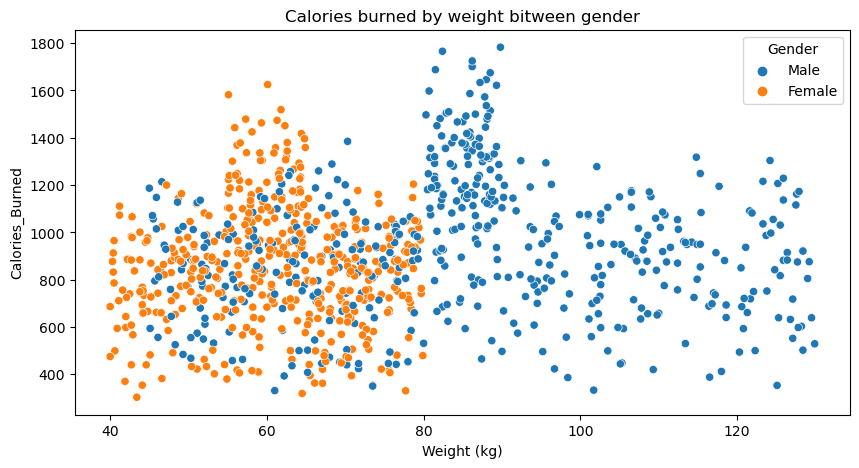

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Weight (kg)', y='Calories_Burned', data=df, hue='Gender')
plt.title('Calories burned by weight bitween gender')
plt.show()

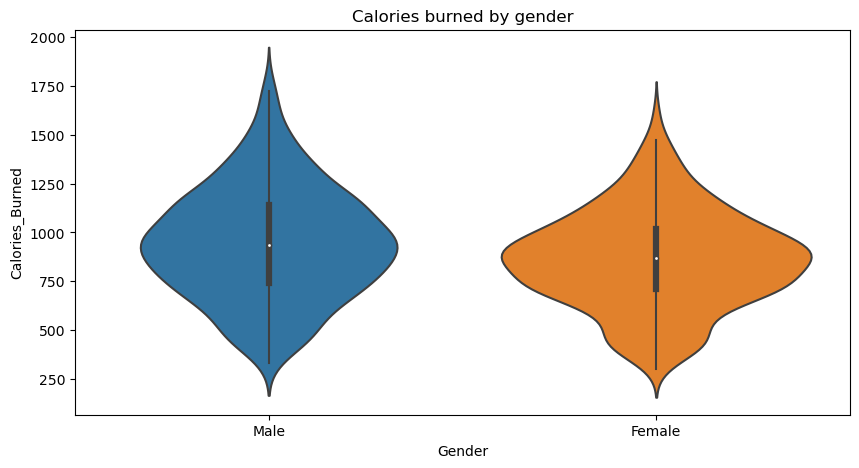

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Gender', y='Calories_Burned', data=df)
plt.title('Calories burned by gender')
plt.show()

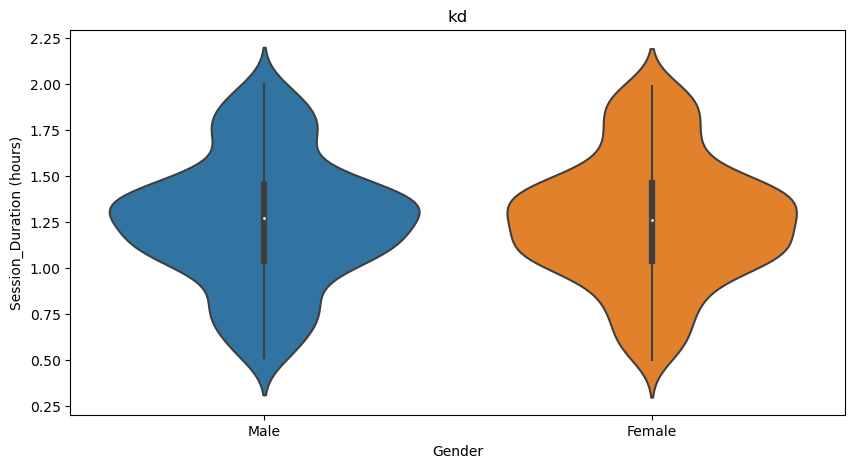

In [20]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Gender', y='Session_Duration (hours)')
plt.title('kd')
plt.show()

In [24]:
df['Workout_Type'].value_counts()

Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: Workout_Type, dtype: int64

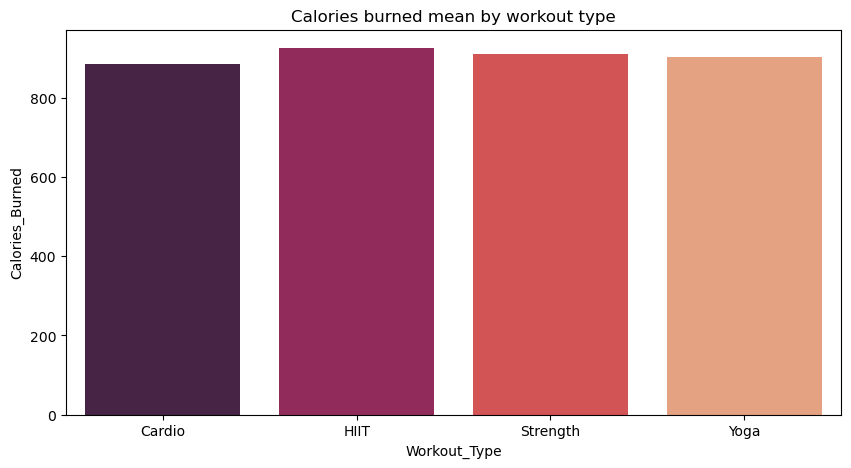

In [35]:
w_type_gender = df.groupby('Workout_Type')['Calories_Burned'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=w_type_gender, x='Workout_Type', y='Calories_Burned', palette="rocket")
plt.title('Calories burned mean by workout type')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

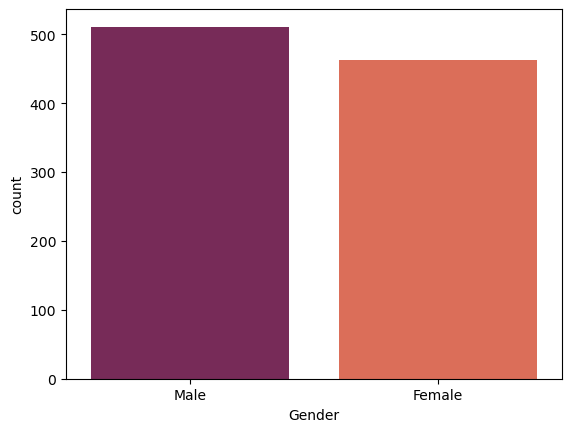

In [38]:
sns.countplot(df['Gender'], palette="rocket")

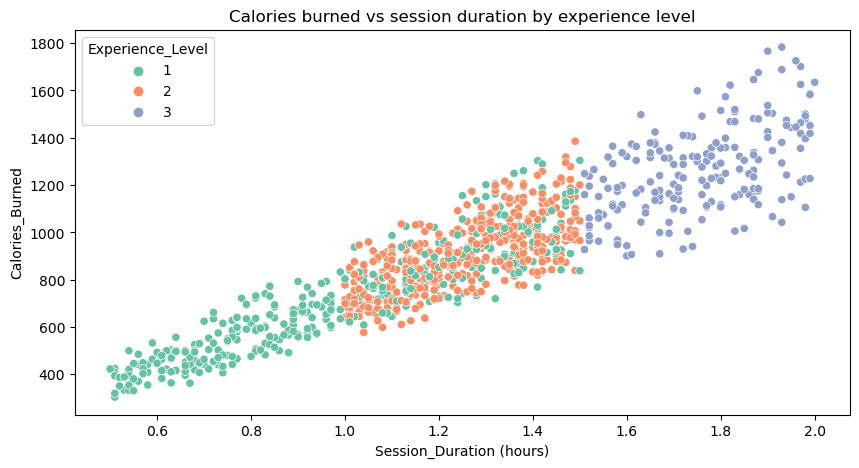

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Experience_Level', palette="Set2")
plt.title('Calories burned vs session duration by experience level')
plt.show()

In [42]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

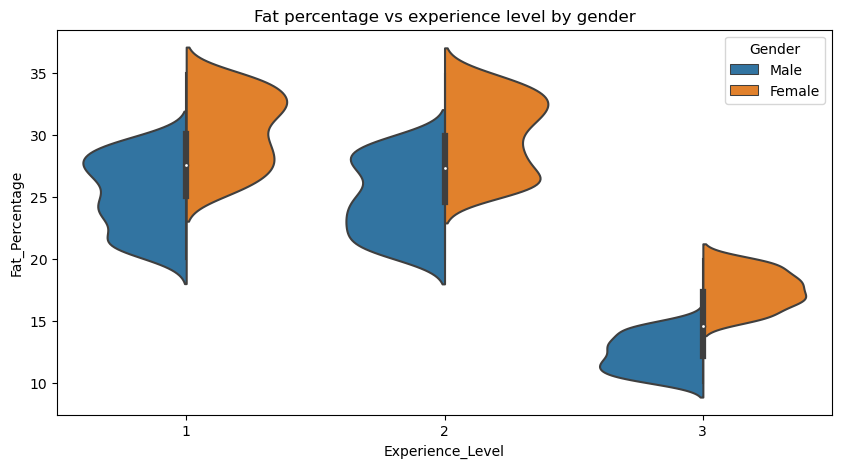

In [58]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x='Experience_Level', y='Fat_Percentage', hue='Gender', split=True)
plt.title('Fat percentage vs experience level by gender')
plt.show()

In [60]:
df['Workout_Type'].value_counts()

Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: Workout_Type, dtype: int64

In [62]:
#Features Encoding by mapping method
dt = df.copy()
dt['Gender'] = dt['Gender'].map({'Male':1,'Female':0})
dt['Workout_Type'] = dt['Workout_Type'].map({'Strength':0, 'Cardio':1, 'Yoga':2, 'HIIT':3})

In [63]:
dt.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,2,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,3,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,1,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,0,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,0,29.2,2.8,3,1,14.39


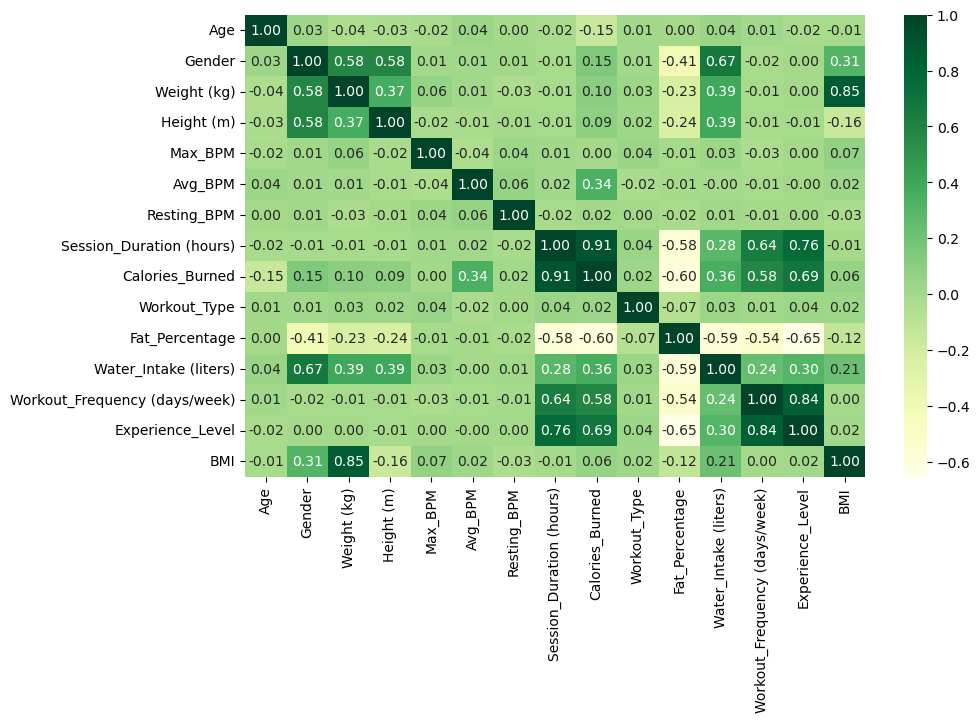

In [70]:
corr_mat = dt.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap='YlGn', fmt='.2f')
plt.show()